<a href="https://colab.research.google.com/github/karthikreddyi12/Crop-Recommendation-System/blob/main/Crop_recomendation_ipyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy pandas scikit-learn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
data = pd.read_csv('/content/Crop_recommendation .csv')
X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(data)

        N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]


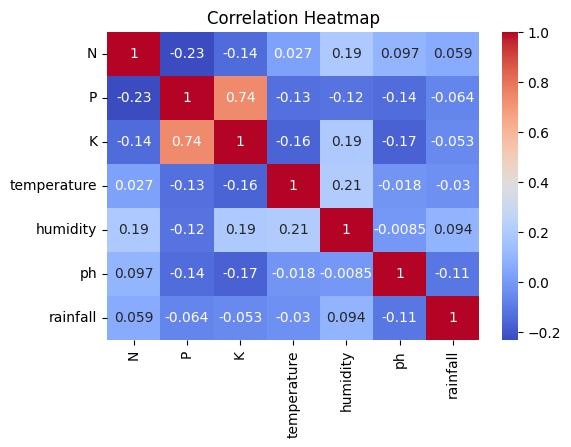

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_data = data.drop('label', axis=1)
plt.figure(figsize=(6, 4))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test,y_pred))

new_data = pd.DataFrame({'N': [83], 'P': [57], 'K': [19], 'temperature': [25.73044432], 'humidity': [70.74739256], 'ph': [6.877869005], 'rainfall': [98.73771338]})

recommended_crop = clf.predict(new_data)
print(f'Recommended Crop: {recommended_crop[0]}')

Accuracy: 0.99
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya

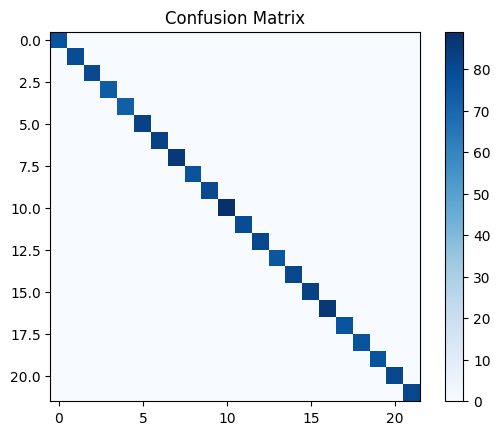

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_train contains the true labels
cnf_matrix = confusion_matrix(y_train, clf.predict(X_train))
np.set_printoptions(precision=2)
plt.figure()
plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()

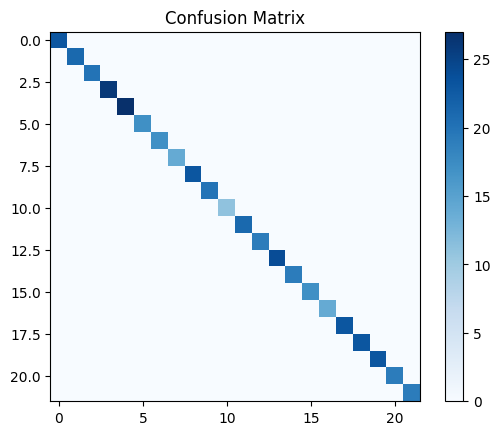

In [ ]:
#confusion matrix
cnf_matrix = confusion_matrix(y_test.astype(str), y_test.astype(str))
np.set_printoptions(precision=2)
plt.figure()
plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

Decision Tree

In [ ]:
data = pd.read_csv('/content/Crop_recommendation .csv')
X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
dt = DecisionTreeClassifier(random_state=40) # Remove n_estimators
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test,y_pred))

new_data = pd.DataFrame({'N': [83], 'P': [57], 'K': [19], 'temperature': [25.73044432], 'humidity': [70.74739256], 'ph': [6.877869005], 'rainfall': [98.73771338]})

recommended_crop = dt.predict(new_data)
print(f'Recommended Crop: {recommended_crop[0]}')

Accuracy: 0.98
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.91      0.87      0.89        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya

LR

In [ ]:
data = pd.read_csv('/content/Crop_recommendation .csv')
X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Remove n_estimators as it is not a valid parameter for LogisticRegression
lr = LogisticRegression(random_state=42)

lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test,y_pred))

new_data = pd.DataFrame({'N': [83], 'P': [57], 'K': [19], 'temperature': [25.73044432], 'humidity': [70.74739256], 'ph': [6.877869005], 'rainfall': [98.73771338]})

# Assuming 'clf' was meant to be 'lr'
recommended_crop = lr.predict(new_data)
print(f'Recommended Crop: {recommended_crop[0]}')

Accuracy: 0.95
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       0.95      1.00      0.98        21
   blackgram       0.83      0.75      0.79        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.80      0.94      0.86        17
      grapes       1.00      1.00      1.00        14
        jute       0.91      0.87      0.89        23
 kidneybeans       1.00      0.95      0.97        20
      lentil       0.83      0.91      0.87        11
       maize       0.94      0.76      0.84        21
       mango       0.95      1.00      0.97        19
   mothbeans       0.85      0.92      0.88        24
    mungbean       0.95      1.00      0.97        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


svm

In [ ]:
data = pd.read_csv('/content/Crop_recommendation .csv')
X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Remove n_estimators as it is not a valid parameter for SVC
sv = SVC(random_state=42)

sv.fit(X_train,y_train)
y_pred = sv.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test,y_pred))

new_data = pd.DataFrame({'N': [83], 'P': [57], 'K': [19], 'temperature': [25.73044432], 'humidity': [70.74739256], 'ph': [6.877869005], 'rainfall': [98.73771338]})

recommended_crop = sv.predict(new_data)
print(f'Recommended Crop: {recommended_crop[0]}')

Accuracy: 0.96
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.91      1.00      0.95        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      0.94      0.97        17
      cotton       0.85      1.00      0.92        17
      grapes       1.00      1.00      1.00        14
        jute       0.77      1.00      0.87        23
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.79      1.00      0.88        11
       maize       1.00      0.86      0.92        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.88      0.93        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya

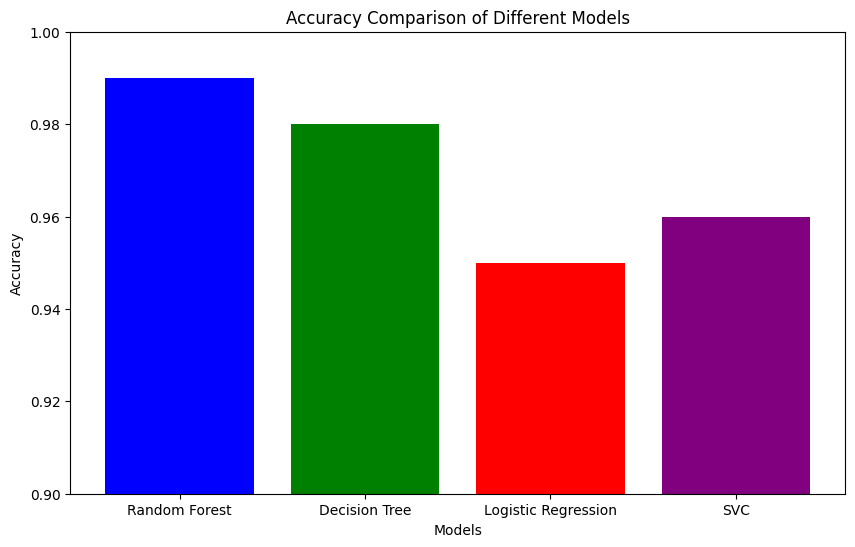

In [ ]:
models = ['Random Forest', 'Decision Tree', 'Logistic Regression', 'SVC']
accuracies = [0.99, 0.98, 0.95, 0.96]
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0.9, 1.0)
plt.show()


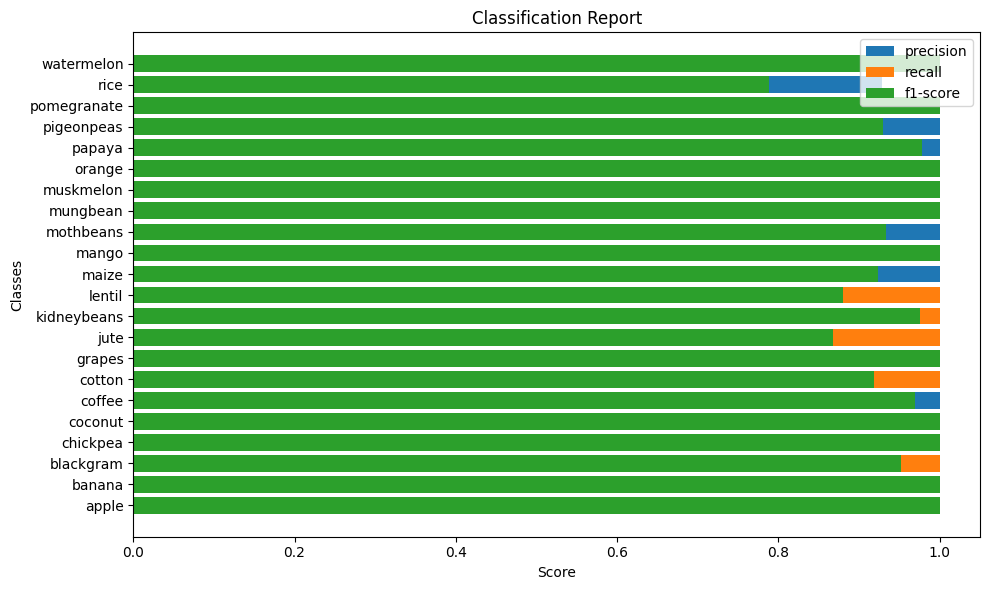

In [ ]:
import matplotlib.pyplot as plt
# Assuming 'y_test' and 'y_pred' are defined from your previous code
report = classification_report(y_test, y_pred, output_dict=True)

# Extract metrics (precision, recall, f1-score) for each class
metrics = ['precision', 'recall', 'f1-score']
classes = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
for i, metric in enumerate(metrics):
  values = [report[cls][metric] for cls in classes]
  plt.barh(classes, values, label=metric)

plt.xlabel('Score')
plt.ylabel('Classes')
plt.title('Classification Report')
plt.legend()
plt.tight_layout()
plt.show()
